# Math Background for ME 505

Watch this video for a brief introduction to the notebook:

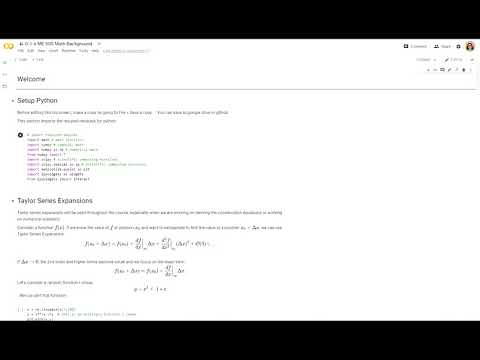

In [ ]:
#@title
from IPython.display import YouTubeVideo
# test video
YouTubeVideo('BoMa1W6e5Qg')

# Setup Python
Before editing this document, make a copy by going to File > Save a copy ... You can save to google drive or github.

This section imports the required modules for python:

In [ ]:
# import required modules
import math # math functions
import sympy # symbolic math
import numpy as np # numerical math
from numpy import *
import scipy # scientific computing functions
import scipy.special as sp # scientific computing functions
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


# Taylor Series Expansions

Taylor series expansions will be used throughout the course, especially when we are working on deriving the conservation equations or working on numerical solutions.

Consider a function $f(x)$. If we know the value of $f$ at position $x_0$ and want to extrapolate to find the value at a position $x_0+\Delta x$, we can use Taylor Series Expansions: $$f(x_0+\Delta x) = f(x_0) + \frac{d f}{dx} \bigg|_{x_0} \Delta x + \frac{d^2 f}{dx^2} \bigg|_{x_0} (\Delta x)^2 + \mathcal{O}(3) + ...$$.

If $\Delta x \rightarrow 0$, the 2nd order and higher terms become small and we focus on the linear term:  $$f(x_0+\Delta x) \approx f(x_0) + \frac{d f}{dx} \bigg|_{x_0} \Delta x.$$


Let's consider a random function I chose: $$y = x^2 + .1*x$$. We can plot that function:

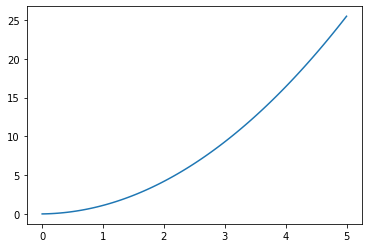

In [ ]:
x = np.linspace(0,5,100)
y = x**2+.1*x  # this is an arbitrary function I chose
plt.plot(x,y)
plt.show()

If we know the value at $x_0 = 4$ for instance, is $f(4) = 16.4$ and its derivative at $x_0$: $\frac{df}{dx}\bigg|_{x_0=4} = \left( 2 x+.1 \right)_{x_0=4} = 8.1$, we could extrapolate the value at a small change in x, say $x_0 + \Delta x = (4+0.5) = 4.5$ as:  $$f(x_0+\Delta x) \approx f(x_0) + \frac{d f}{dx} \bigg|_{x_0} \Delta x = 16.4 + (8.1)*.5 = 20.45.$$ 
The exact solution is $y_1 = (x_0+\Delta x)^2 + .1 (x_0+\Delta x) = (4.5)^2 + .1 (4.5) = 20.7$.

Let's plot this:


In [ ]:
x0s = widgets.FloatSlider(value = 4, min = 0, max = 5, step = .1, description = 'x0:')
dxs = widgets.FloatSlider(value = 0.5, min = 0.01, max = 1, step = .01, description = 'dx:')

x = np.linspace(0,5,100)
y = x**2+.1*x  # this is an arbitrary function I chose

@interact
def plot_TS(x0 = x0s, dx = dxs):
  y0 = x0**2+.1*x0  
  dfdx = 2*x0+.1
  y1 = y0 + dfdx*dx
  y1e = (x0+dx)**2+.1*(x0+dx)

  plt.plot(x,y) 
  plt.plot([x0,x0+dx],[y0,y1],'r:',linewidth=3)
  plt.plot([x0,x0+dx,x0+dx],[y0,y0,y1],'b:',linewidth=3)
  plt.text(x0-.2,y0,'$(x_0,f(x_0))$',ha='right', color='red')
  plt.text(x0+dx-.2,y1,'$(x_0+\Delta x,f(x_0+\Delta x))$', ha='right', color='blue')
  plt.text(x0+dx/2,y0-2,'$\Delta x$')
  plt.text(x0+dx+.2,y0+(y1-y0)/4,'$\\frac{df}{dx} \Delta x$')
  plt.plot(x0,y0,'r*',markersize=10)
  plt.plot(x0+dx,y1e,'c*',markersize=10)
  plt.plot(x0+dx,y1,'b*',markersize=10)
  plt.show()

interactive(children=(FloatSlider(value=4.0, description='x0:', max=5.0), FloatSlider(value=0.5, description='…

Look at the triangle indiacated. The step size is $\Delta x$ and the change in height is the slope times the step size: $\frac{df}{dx} \Delta x$. If you make the step size larger or smaller in the graph above, consider how the accuracy of the approximation changes.

The graph below shows the percent error as a function of step size ($\Delta x$).

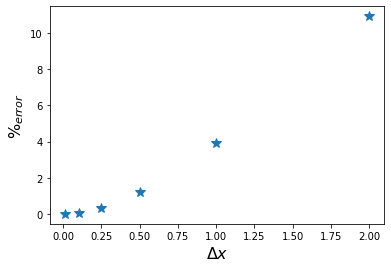

In [ ]:
x0 = 4
y0 = x0**2+.1*x0  
dfdx = 2*x0+.1
dx = np.array([0.01, 0.1,.25, .5, 1, 2])


y1 = y0+dfdx*dx
y1e =  (x0+dx)**2+.1*(x0+dx)
err  = (y1e-y1)/y1e*100;

plt.plot(dx,err,'*',markersize=10)
plt.xlabel('$\Delta x$',FontSize = 16)
plt.ylabel('$\%_{error}$',FontSize = 16)
plt.show()

# Exponentials
Exponential functions are the solution to the the differential equation $\frac{df}{dx} \pm c f = 0$: $$f = a \exp(\mp c x) $$

In the snippet of code below, with the sldiers change $a$ and $c$ to explore how they impact the exponential profile. 

In [ ]:
aS = widgets.FloatSlider(value = 4, min = 0, max = 5, step = .1, description = 'a:')
cS = widgets.FloatSlider(value = 5, min = 0, max = 5, step = .1, description = 'c:')

@interact
def plot_exp(a=aS, c = cS):
  x = np.linspace(0,10,1000)
  ys = a*np.exp(-c*x)
  plt.plot(x, ys, '-')

  plt.title('$y = a~\exp(-c~x)$')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.show()

interactive(children=(FloatSlider(value=4.0, description='a:', max=5.0), FloatSlider(value=5.0, description='c…

For an exponential decay, often it is convenient to think of the exponential with a the form:
$ f = a \exp \left( - \frac{x}{L} \right)$, where $L$ is the distance over which the exponential decays to $\frac{1}{e} \approx 37 \%$ of the initial amplitude. The decay constant is $\frac{1}{c}$ compared to the example above. 

When we talk about **lumped capacitance** models, $L$ will be $\tau$, the time constant of the temperature change. When we talk about **fins** or **extended surfaces**, we will use $L_h$, which will be the lengthscale over which the temperature decays and is called the fin decay length or the healing length.

In the plot below, see how changing $L$ impacts the curve. 

In [ ]:
Ls = widgets.FloatSlider(value = 167, min = 1, max = 500, step = 1, description = 'L:')

@interact
def plot_decay(L=Ls):
  x = np.linspace(0,500,1000)
  ys = np.exp(-x/L)
  plt.plot(x, ys, '-')
  plt.plot([L,L],[0,1/np.exp(1)],':r')
  plt.plot([0,L],[1/np.exp(1),1/np.exp(1)],':r')
  plt.text(L,1/np.exp(1), '$( L,\\frac{1}{e} )$', fontsize = 14)

  plt.title('$y = \exp(-x/L)$')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

  plt.show()

interactive(children=(FloatSlider(value=167.0, description='L:', max=500.0, min=1.0, step=1.0), Output()), _do…

# Trigonometric Functions

Trigonometric functions will show up as solutions to the differential equation: $\frac{d^2 f}{dx^2} + \lambda^2 f = 0$, which has the general solution of: $$f = a_1 \sin \left( \lambda x \right) + a_2 \cos \left( \lambda x \right) $$.

A few points to recall about trig functions:
*   $\sin(0) = 0$
*   $\cos(0) = 1$ and $\left( \frac{d}{dx}\cos(x) \right) \big|_{x=0} = 0$
*   $\frac{d}{dx} \left( \sin\left( \lambda x \right) \right) = \lambda \cos \left( \lambda x \right)$
*   $\frac{d}{dx} \left( \cos\left( \lambda x \right) \right) = - \lambda \sin \left( \lambda x \right)$

Sines and cosines oscillate, so there is an infinite set of roots to equations like $\sin(x) = 0$. We will use tables or equations to define the set of roots to equations like this.

The value at $x=0$ and the derivative at $x=0$ will be helpful for boundary conditions. 

In the code snipped below, change $a_1$, $a_2$, and $\lambda$ (called $l$ in the code) with the sldiers to look at how the functions vary with these parameters.


In [ ]:
a1s = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'a1:')
a2s =widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'a2:')
ls = widgets.FloatSlider(value = 1, min = 0.01, max = 10, step = 0.1, description = 'Lambda:')

@interact
def plot_trig(a1=a1s, a2=a2s, l = ls):
  x = np.linspace(0,4*2*np.pi,1000)
  y1 = a1*np.sin(l*x)
  y2 = a2*np.cos(l*x)
  ys = a1*np.sin(l*x) + a2*np.cos(l*x)

  fig, ax = plt.subplots()
  plt.plot(x, y1, 'r:',label='$y_1 = a_1 \sin(\lambda x)$')
  plt.plot(x, y2, 'b:',label='$y_2 = a_2 \cos(\lambda x)$')
  plt.plot(x, ys, 'k-',linewidth = 3, label='y = y_1+y_2')
  plt.title('$y = a_1 sin ( \lambda x ) + a_2 cos ( \lambda x )$')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  leg = ax.legend();

  plt.show()

interactive(children=(FloatSlider(value=1.0, description='a1:', max=10.0), FloatSlider(value=1.0, description=…

# Hyperbolic Functions

Hyperbolic functions will show up as solutions to the differential equation: $\frac{d^2 f}{dx^2} - \lambda^2 f = 0$, which has the general solution of: $$f = b_1 \sinh \left( \lambda x \right) + b_2 \cosh \left( \lambda x \right) = b_3 \exp \left(\lambda x \right) + b_4 \exp \left(-\lambda x \right),$$ where $\sinh$ is the hyperbolic sine function and $\cosh$ is the hyperbolic cosine function. 

A few points to recall about hyperbolic functions:
*   The difference in the governing differential equation between hyperbolic and trigonometric functions is the negative sign on the $\lambda^2 f$ term.
*   Treat hyperbolic functions just like you treat sines and cosines. You can find their value with your calculator, computer program, or in tables in the textbook.
*   Hyperbolic functions can be written as sums of exponentials: $\sinh(x) = \frac{e^x - e^{-x}}{2}$ and $\cosh(x) = \frac{e^x + e^{-x}}{2}$ 
*   At $x=0$, they behave similar to their trig counterparts: $\sinh(0) = 0$ and $\cosh(0) = 1$, and the derivative of $cosh(x)$ at $x=0$ = 0.
*   Their derivatives are similar too, but both are positive: $\frac{d}{dx} \left( \sinh\left( \lambda x \right) \right) = \lambda \cosh \left( \lambda x \right)$ and  $\frac{d}{dx} \left( \cosh\left( \lambda x \right) \right) = \lambda \sinh \left( \lambda x \right)$
*   Unlike sines and cosines, these functions do not oscillate. There would generally be a finite number of solutions to an equation like $sinh(x) = 1$.

In the code snipped below, change $b_1$, $b_2$, and $\lambda$ (called $l$ in the code) to look at how the functions vary with these parameters.


In [ ]:
b1s = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'b1:')
b2s =widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'b2:')
ls = widgets.FloatSlider(value = .2, min = 0.01, max = 2, step = 0.1, description = 'Lambda:')

@interact
def plot_trig(b1=b1s, b2=b2s, l = ls):
  x = np.linspace(-10,10,1000)
  y1 = b1*np.sinh(l*x)
  y2 = b2*np.cosh(l*x)
  ys = y1+y2

  fig, axs = plt.subplots(2,2)
  fig.set_figheight(9)
  fig.set_figwidth(9)
  fig.subplots_adjust(hspace=0.5, wspace=0.5)

  axs[0,0].plot(x, y1, '-')
  axs[0,0].plot(0,0,'r*')
  axs[0,0].text(0,0, '$(0,0)$', fontsize = 14)
  axs[0,0].set_title('$b_1 sinh ( \lambda x )$')
  axs[0,0].set(xlabel='$x$', ylabel='$y_1$')

  axs[0,1].plot(x, y2, '-')
  axs[0,1].plot(0,b2,'r*')
  axs[0,1].plot([-.5, .5],[b2,b2],':r', linewidth = 3)
  axs[0,1].set_title('$b_2 cosh ( \lambda x )$')
  axs[0,1].set(xlabel='$x$', ylabel='$y_2$')
  axs[0,1].text(0,b2, '$(0,b_2)$', fontsize = 14)


  axs[1,0].plot(x, ys, '-')
  axs[1,0].set_title('$b_1 sinh ( \lambda x ) + b_2 cosh ( \lambda x )$')
  axs[1,0].set(xlabel='$x$', ylabel='$y$')

  axs[1,1].axis('off')

interactive(children=(FloatSlider(value=1.0, description='b1:', max=10.0), FloatSlider(value=1.0, description=…

# Bessel's Functions - Order 0

In this class, in separation of variables, we will use Bessel's functions. Typically these show up in radial coordinates conduction problems. We'll limit the discussion here to Bessel's functions of Order 0.

Bessel's functions of Order 0 will show up as solutions to the differential equation: $r \frac{d^2 f}{dr^2} + r \frac{df}{dr} + \lambda^2 r^2 f = 0$, which has the general solution of: $$f = c_1 J_0 \left( \lambda r \right) + c_2 Y_0 \left( \lambda r \right),$$ where $J_0$ is a Bessel’s function of the 1st kind of order 0 and $Y_0$ is a Bessel’s function of the 2nd kind of order 0

A few points to note about Bessel's functions:
*   Treat Bessel's functions just like you treat sines and cosines. You can find their value with your calculator, computer program, or in tables in the textbook. 
*   At $x=0$, $J_0(0) = 1$ and $\left(\frac{d}{dr} J_0 \right) \big|_{x=0} = 0$, and $\lim_{x \to \infty} Y_0(x) \rightarrow - \infty$.
*   Their derivatives bring in Bessel's functions of Order 1: $\frac{d}{dr} \left( J_0 \left( \lambda r \right) \right) = - \lambda J_1 \left( \lambda r \right)$ and  $\frac{d}{dr} \left( Y_0 \left( \lambda r \right) \right) = - \lambda Y_1 \left( \lambda r \right)$. There are relations that can link Bessel's functions of different orders to simplify expressions. But in general, we won't spend too much time manipulating the Bessel's Functions.
*   Bessel's functions are oscillate, but they don't have the uniform period of oscillation like sines and cosines do. Thus there will be an infinite set of roots to an equation like: $J_0(r) = 0$. There are tables we will use to identify the set of roots, or you can write a short script. The first 5 roots of $J_0(r) = 0$ are shown in the first plot below as blue stars.

In the code snipped below, change $c_1$, $c_2$, and $\lambda$ (called $l$ in the code) to look at how the functions vary with these parameters.

In [ ]:
c1s = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'c1:')
c2s =widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'c2:')
ls = widgets.FloatSlider(value = 1, min = 0.01, max = 2, step = 0.1, description = 'Lambda:')

@interact
def plot_trig(c1=c1s, c2=c2s, l = ls):
  r = np.linspace(0,20,1000)
  y1 = c1*sp.jv(0,l*r)  # jv is a bessel function of the first kind
                        # the first argument is the order, the second the position
  y2 = c2*sp.yv(0,l*r)  # yv is a bessel function of the second kind
                        # the first argument is the order, the second the position
  ys = y1+y2

  # First 5 roots of J_0(r) = 0 taken from a textbook
  rt1=np.array([2.40482555769577,	5.52007811028631,	8.65372791291101,	11.7915344390142,	14.9309177084877])


  fig, axs = plt.subplots(2,2)
  fig.set_figheight(9)
  fig.set_figwidth(9)
  fig.subplots_adjust(hspace=0.5, wspace=0.5)

  axs[0,0].plot(r, y1, '-')
  axs[0,0].plot(0,c1,'r*',markersize = 10)
  axs[0,0].plot([0,1],[c1,c1],'r:', linewidth = 3)
  axs[0,0].text(0,c1, '$(0,c_1)$', fontsize = 14)
  axs[0,0].plot([0, 20],[0,0],'k')
  axs[0,0].plot(rt1/l,[0,0,0,0,0],'b*',markersize=10)
  axs[0,0].text(5,c1*.45,'First 5 roots shown w/ blue stars')
  axs[0,0].set_title('$c_1 J_0 ( \lambda r )$')
  axs[0,0].set(xlabel='$r$', ylabel='$y_1$')

  axs[0,1].plot(r, y2, '-')
  axs[0,1].set_title('$c_2 Y_0 ( \lambda r )$')
  axs[0,1].set(xlabel='$r$', ylabel='$y_2$')

  axs[1,0].plot(r, ys, '-')
  axs[1,0].set_title('$c_1 J_0 ( \lambda r ) + c_2 Y_0 ( \lambda r )$')
  axs[1,0].set(xlabel='$r$', ylabel='$y$')

  axs[1,1].axis('off')


interactive(children=(FloatSlider(value=1.0, description='c1:', max=10.0), FloatSlider(value=1.0, description=…

# Modified Bessel's Functions - Order 0

In this class, in separation of variables, we will also encounter Modified Bessel's functions. Typically these show up in radial coordinates conduction problems. We'll limit the discussion here to Modified Bessel's functions of Order 0.

Modified Bessel's functions of Order 0 will show up as solutions to the differential equation: $r \frac{d^2 f}{dr^2} + r \frac{df}{dr} \mathbf{-} \lambda^2 r^2 f = 0$, which has the general solution of: $$f = d_1 I_0 \left( \lambda r \right) + d_2 K_0 \left( \lambda r \right),$$ where $I_0$ is a **Modified** Bessel’s function of the 1st kind of order 0 and $Y_0$ is a **modified** Bessel’s function of the 2nd kind of order 0. Note the only difference between this differential equation and the one for regualar Bessel's functions is the negative sign before therm $\lambda^2 r^2 f$.

A few points to note about Modified Bessel's functions:
*   Treat modified Bessel's functions just like you treat sines and cosines. You can find their value with your calculator, computer program, or in tables in the textbook. 
*   At $x=0$, $I_0(0) = 1$ and $\left(\frac{d}{dr} I_0 \right) \big|_{x=0} = 0$, and $\lim_{x \to 0} K_0(x) \rightarrow  \infty$.
*   Their derivatives bring in modified Bessel's functions of Order 1: $\frac{d}{dr} \left( I_0 \left( \lambda r \right) \right) = \lambda I_1 \left( \lambda r \right)$ and  $\frac{d}{dr} \left( K_0 \left( \lambda r \right) \right) = - \lambda K_1 \left( \lambda r \right)$. There are relations that can link modified Bessel's functions of different orders to simplify expressions. But in general, we won't spend too much time manipulating the Bessel's Functions.

In the code snipped below, change $d_1$, $d_2$, and $\lambda$ (called $l$ in the code) to look at how the functions vary with these parameters.

In [ ]:
d1s = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'd1:')
d2s =widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1, description = 'd2:')
ls = widgets.FloatSlider(value = 1, min = 0.01, max = 2, step = 0.1, description = 'Lambda:')

@interact
def plot_trig(d1=d1s, d2=d2s, l = ls):
  r = np.linspace(0,10,1000)
  y1 = d1*sp.iv(0,l*r)  # jv is the modified bessel function of the first kind
                        # the first argument is the order, the second the position
  y2 = d2*sp.kv(0,l*r)  # kv is the modified bessel function of the second kind
                        # the first argument is the order, the second the position
  ys = y1+y2


  fig, axs = plt.subplots(2,2)
  fig.set_figheight(9)
  fig.set_figwidth(9)
  fig.subplots_adjust(hspace=0.5, wspace=0.5)

  axs[0,0].plot(r, y1, '-')
  axs[0,0].plot(0,d1,'r*',markersize = 10)
  axs[0,0].plot([0,1],[d1,d1],'r:', linewidth = 3)
  axs[0,0].text(0,d1, '$(0,d_1)$', fontsize = 14)
  axs[0,0].set_title('$d_1 I_0 ( \lambda r )$')
  axs[0,0].set(xlabel='$r$', ylabel='$y_1$')

  axs[0,1].plot(r, y2, '-')
  axs[0,1].set_title('$d_2 K_0 ( \lambda r )$')
  axs[0,1].set(xlabel='$r$', ylabel='$y_2$')

  axs[1,0].plot(r, ys, '-')
  axs[1,0].set_title('$d_1 I_0 ( \lambda r ) + d_2 K_0 ( \lambda r )$')
  axs[1,0].set(xlabel='$r$', ylabel='$y$')

  axs[1,1].axis('off')

interactive(children=(FloatSlider(value=1.0, description='d1:', max=10.0), FloatSlider(value=1.0, description=…